## Supplementary notebook for Size matters: An analytical study of the role of tissue size in spatiotemporal distribution of morphogens unveils a transition between different Reaction-Diffusion regimes.
### Alberto S. Ceccarelli 1 , Augusto Borges 1, 2 & Osvaldo Chara 1,3
##### 1 Systems Biology Group, Institute of Physics of Liquids and Biological Systems, National Scientific and Technical Research Council, University of La Plata, La Plata, Argentina.
##### 2 Research Unit of Sensory Biology &amp; Organogenesis and Graduate School of Quantitative Biosciences (QBM), Helmholtz Zentrum München, Ingolstädter Landstraße 1, 85764 Neuherberg, Germany.
##### 3 Center for Information Services and High Performance Computing, Technische Universität Dresden, Dresden, Germany.
##### *Corresponding author:
##### Osvaldo Chara
##### Center for Information Services and High Performance Computing (ZIH), Technische Universität Dresden, Nöthnitzer Straße 46, 01187 Dresden, Germany. Tel. +49 351 463-38780, E-mail: osvaldo.chara@tu-dresden.de
##### Systems Biology Group (SysBio), Institute of Physics of Liquids and Biological Systems (IFLySIB), National Scientific and Technical Research Council (CONICET) and University of La Plata, Calle 59 N 789, 1900 La Plata, Argentina. Tel. +54 221 4233283 Ext: 26, E-mail: ochara@iflysib.unlp.edu.ar Web: http://sysbioiflysib.wordpress.com/

## The next cell plots fig 5 from the paper.
#### Run the following cell to plot fig 5 from the paper and to save it as a png image.
##### Expected computational time: 5 seconds.

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in multiply
  
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  


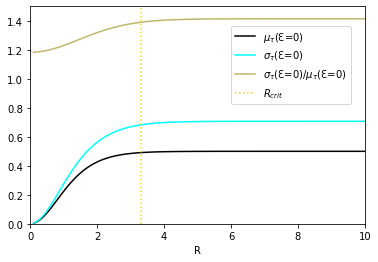

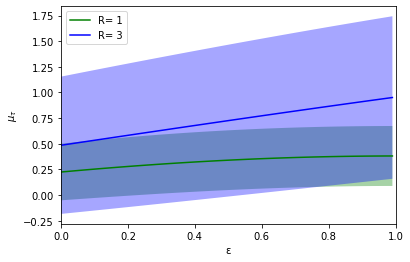

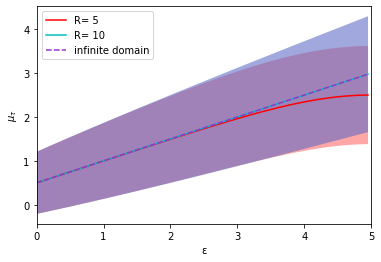

In [36]:
# Import libraries.
import numpy as np
import matplotlib.pyplot as plt

# Define functions

def aux(x,j):
    return (np.cos(((j+1/2)*np.pi/R)*x))/(((((j+1/2)*np.pi/R)**2+1)**2)*(np.exp(-x)/(1+np.exp(-2*R))-np.exp(x)/(1+np.exp(2*R))))

def mean_time_finite(x,j):
    return 2*sum(aux(x,j))/R

def aux2(x,j):
    return (np.cos(((j+1/2)*np.pi/R)*x))/(((((j+1/2)*np.pi/R)**2+1)**3)*(np.exp(-x)/(1+np.exp(-2*R))-np.exp(x)/(1+np.exp(2*R))))

def aux3(x,j):
    return 2*2*sum(aux2(x,j))/R

def standard_deviation_finite(x,j):
    return np.sqrt(aux3(x,j)-mean_time_finite(x,j)**2)

def mean_time_infinite(x):
    return (1+x)/2

def aux4(x):
    return x*x/4+3*x/4+3/4
# +(x*x-3*x+3)*np.exp(2*x)

def standard_deviation_infinite(x):
    return np.sqrt(aux4(x)-mean_time_infinite(x)**2)

# This part of the code plots and save fig. 5 panel a.

# Define necessary arrays to be used in the simulation.
j = np.arange(0,5000,1)
lengths = np.arange(0,10+0.1,10/100)
mean_time = []
std_dev = []
ratio = []
# Loop over all lenghts.
for length in lengths:
    R=length
#     Save in an array the mean time for an finite tissue at ε=0.
    mean_time.append(mean_time_finite(0,j))
# Plot the mean time for an finite tissue at ε=0.
plt.plot(lengths, mean_time, label="$μ_{τ}$(Ɛ=0)", color="black",linewidth=5.0)
plt.legend(prop={'size': 13})
plt.xlabel("R")
# Loop over all lenghts.
for length in lengths:
    R=length
#     Save in an array the standard deviation for an finite tissue at ε=0.
    std_dev.append(standard_deviation_finite(0,j))
# Plot the standard deviation for an finite tissue at ε=0.
plt.plot(lengths, std_dev, label="$σ_{τ}$(Ɛ=0)", color="aqua",linewidth=5.0)
plt.legend(prop={'size': 13})
plt.xlabel("R")
# Loop over all lenghts.
for length in lengths:
    R=length
#     Save in an array the standard deviation divided by the mean time for an finite tissue at ε=0.
    ratio.append(standard_deviation_finite(0,j)/mean_time_finite(0,j))
# Plot the standard deviation divided by the mean time for an finite tissue at ε=0.
plt.plot(lengths, ratio, label="$σ_{τ}$(Ɛ=0)/$μ_{τ}$(Ɛ=0)", color="darkkhaki",linewidth=5.0)
plt.legend(prop={'size': 13})
plt.xlabel("R")
# Plot a vertical line in the position of Rcrit.
plt.axvline(x=3.3, color="gold", ls=":", label="$R_{crit}$",linewidth=7.0)
plt.legend(loc=(0.52,0.49),prop={'size': 13})
# Set axis limits
plt.xlim(0,10)
plt.ylim(0,1.5)
# Set font sizes
plt.rcParams.update({'font.size': 13})
plt.xlabel("R", fontsize=17)
# Save the figure.
plt.savefig("fig5a.png", dpi=500)
plt.show()
plt.close()

# This part of the code plots and save fig. 5 panel b.

# Define necessary arrays to be used in the simulation.
j = np.arange(0,5000,1)
lengths = [1.1, 3]
colors = ["g", "b"]
# A counter that is going to be used to choose the color in the plot.
i=0
# Loop over all lenghts.
for length in lengths:
    R=length
    xi_all = np.arange(0,1+1/100,1/100)
    # Define necessary arrays to be used in the simulation.
    mean_time = []
    std_dev = []
#     Loop over all positions in the tissue.
    for xi in xi_all:
#         Save in an array the mean time in every position of the tissue.
        mean_time.append(mean_time_finite(xi,j))
#         Save in an array the standard deviation in every position of the tissue.
        std_dev.append(standard_deviation_finite(xi,j))
#     Change the arrays to numpy arrays
    mean_time = np.array(mean_time)
    std_dev = np.array(std_dev)
#     Plot the figure.
    plt.plot(xi_all, mean_time, label="R= "+str(R), color=colors[i],linewidth=5.0)
    plt.fill_between(xi_all, mean_time-std_dev, mean_time+std_dev, alpha=0.35, facecolor=colors[i])
    plt.legend(loc=2, prop={'size': 13})
    plt.xlabel("ε")
    plt.ylabel("$μ_{τ}$")
    i+=1
# Set x axis limits
plt.xlim(0,1)
# Set font sizes
plt.rcParams.update({'font.size': 13})
plt.xlabel("ε",fontsize=17)
plt.ylabel("$μ_{τ}$",fontsize=17)
# Save the figure.
plt.savefig("fig5b.png", dpi=500)
plt.show()

# This part of the code plots and save fig. 5 panel c.

# Define necessary arrays to be used in the simulation.
j = np.arange(0,5000,1)
lengths = [5.1, 10]
colors = ["r", "c"]
# A counter that is going to be used to choose the color in the plot.
i=0
# Loop over all lenghts.
for length in lengths:
    R=length
    xi_all = np.arange(0,5+5/100,5/100)
    # Define necessary arrays to be used in the simulation.
    mean_time = []
    std_dev = []
#     Loop over all positions in the tissue.    
    for xi in xi_all:
#         Save in an array the mean time in every position of the tissue.
        mean_time.append(mean_time_finite(xi,j))
#         Save in an array the standard deviation in every position of the tissue.
        std_dev.append(standard_deviation_finite(xi,j))
#     Change the arrays to numpy arrays
    mean_time = np.array(mean_time)
    std_dev = np.array(std_dev)
#     Plot the figure.    
    plt.plot(xi_all, mean_time, label="R= "+str(R), color=colors[i],linewidth=5.0)
    plt.fill_between(xi_all, mean_time-std_dev, mean_time+std_dev, alpha=0.35, facecolor=colors[i])
    plt.legend(loc=2, prop={'size': 13})
    plt.xlabel("ε")
    plt.ylabel("$μ_{τ}$")
    i+=1
# Define necessary arrays to be used in the simulation.    
mean_time = []
std_dev = []
# Loop over all positions in the tissue.    
for xi in xi_all:
#    Save in an array the mean time in every position of the tissue.
    mean_time.append(mean_time_infinite(xi))
#    Save in an array the standard deviation in every position of the tissue.
    std_dev.append(standard_deviation_infinite(xi))
# Change the arrays to numpy arrays
mean_time = np.array(mean_time)
std_dev = np.array(std_dev)
# Plot the figure.   
plt.plot(xi_all, mean_time, color="darkorchid", ls="--",label="infinite domain",linewidth=5.0)
plt.fill_between(xi_all, mean_time-std_dev, mean_time+std_dev, alpha=0.35, facecolor="darkorchid")
plt.legend(loc=2, prop={'size': 13})
plt.xlabel("ε")
plt.ylabel("$μ_{τ}$")
# Set x axis limits
plt.xlim(0,5)
# Set font sizes
plt.rcParams.update({'font.size': 13})
plt.xlabel("ε",fontsize=17)
plt.ylabel("$μ_{τ}$",fontsize=17)
# Save the figure.   
plt.savefig("fig5c.png", dpi=500)
plt.show()



